import pandas as pd  
df.column_1.mode()  # мода  
df.column_1.median()  # медиана  
df.column_1.mean()  # среднее  
df.A.var() # дисперсия  
df.A.std() # ст. отклонение  
df.quantile(q=0.75) # процентиль  
df.quantile(q=[0.5, 0.7]) # список всех желаемых процентилей

import numpy as np  
from scipy import stats  
stats.mode(df.column_1) # мода

import numpy as np  
np.median(df.column_1) # медиана  
np.mean(df.column_1) # среднее  
np.percentile(df.A, [0, 100]) # размах  
np.var(df.A) # дисперсия  
np.std(df.A)  # ст. отклонение

import seaborn as sns  
sns.boxplot(df.A) # ящик  
ax = sns.boxplot(df.A)  
ax = sns.swarmplot(df.A) # добавляем наблюдения из выборки в виде точек

In [14]:
import numpy as np
std = round(np.std(list(range(0, 100)), ddof=1), 3)
std

29.011

### Проект

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

**шаг 2**

In [3]:
df_0 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-bykov/stat/lesson_1/games.csv')
df_0.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [112]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df_0.isna().sum() # считаем кол-во строк с NaN

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
df_0.Year.size - df_0.Year.count() # вариант подсчета вручную (count не включает значения NaN, а size включает)

271

In [6]:
df = df_0.dropna() # удаляем строки с NaN
df.shape

(16291, 11)

**шаг 4**

In [116]:
df.Year.describe() # статистика по годам выпуска

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [117]:
stats.mode(df.Year) # считаем моду по годам выпуска

ModeResult(mode=array([2009.]), count=array([1431]))

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


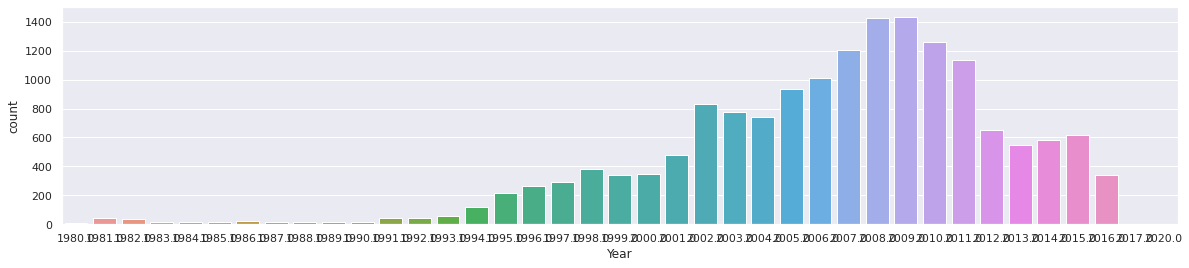

In [182]:
sns.set(rc={'figure.figsize':(20, 4)}) # параметры задаются ДО вызова функции 
sns.countplot(df['Year'])

In [118]:
# df.query(df['Year'] < 2007).shape
df.Year[df.Year > 2007].size / df.Year.size * 100 # доля игр, выпущенных после 2007 года (считаем кол-во строк в колонке)

49.063900313056294

In [119]:
df.Year[df.Year > 2007].count() / df.Year.count() * 100 # 2-й способ (count не включает значения NaN, а size включает; 
# в данном случае рез-т одинаковый, т.к. му уже удалили все NaN)

49.063900313056294

In [120]:
df.query('Year > 2007').Year.size / df.Year.size * 100 # 3-й способ (другой вариант фильтрации)

49.063900313056294

**шаг 5**

In [121]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [143]:
pl = df.groupby('Platform').agg({'Year': 'count'}).sort_values('Year', ascending = False) # кол-во релизов по платформам
dfp = pl / df.Year.size * 100 # доля платформы в общем кол-ве релизов
dfp7 = dfp.query('Year > 7') # фильтруем те, что больше 7%
dfp7.index # получаем список платформ-лидеров

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS'], dtype='object', name='Platform')

**шаг 6**

In [158]:
df.Publisher.value_counts().head(1) # лидер по частоте встречаемости

Electronic Arts    1339
Name: Publisher, dtype: int64

In [154]:
stats.mode(df.Publisher) # то же самое через вычисление моды

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

**шаг 7**

In [163]:
df.query("Publisher == 'Nintendo'").describe() # выводим сразу все статистики

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,16545.000000,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


In [164]:
df.query("Publisher == 'Nintendo'").median() # считаем только медиану

Rank            2262.000
Year            2005.000
NA_Sales           0.375
EU_Sales           0.120
JP_Sales           0.280
Other_Sales        0.030
Global_Sales       0.920
dtype: float64

**шаг8**

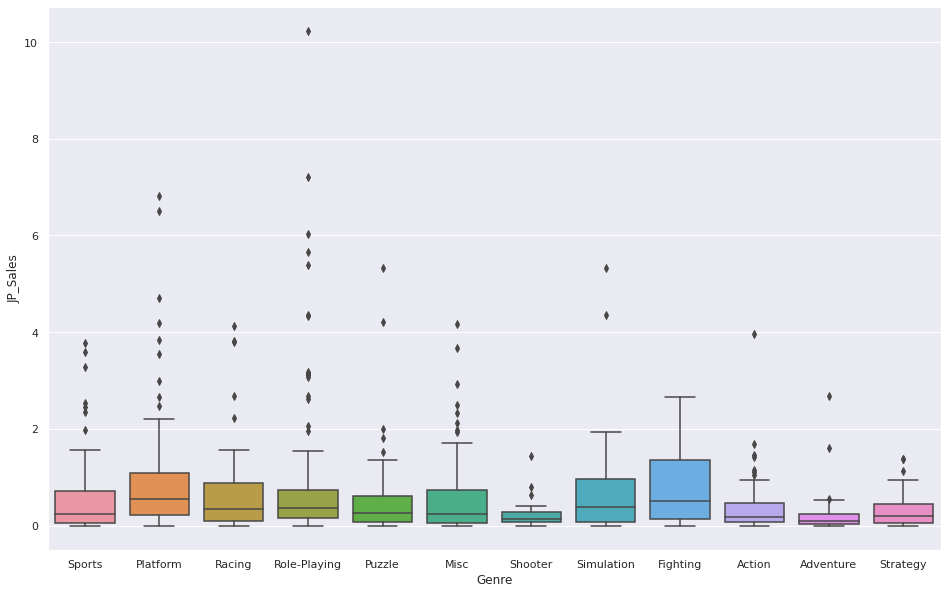

In [186]:
plt.figure(figsize=(16,10))
sns.boxplot(x='Genre', y='JP_Sales', data=df.query("Publisher == 'Nintendo'"))

**шаг9**

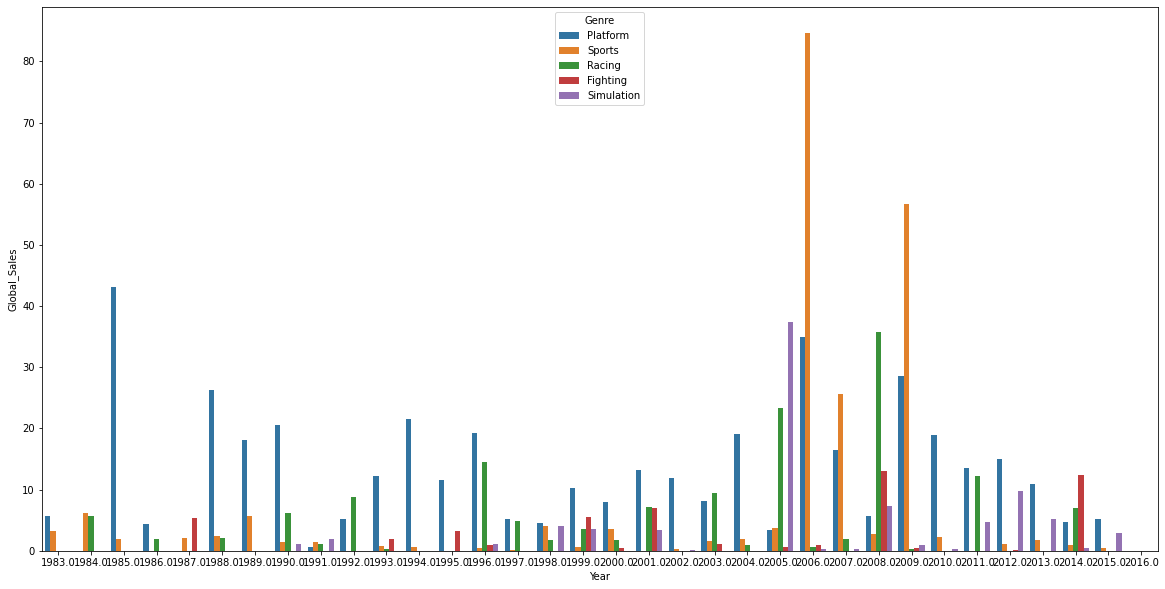

In [37]:
df_nin = df.query("Publisher == 'Nintendo' and (Genre == 'Fighting' or Genre == 'Simulation' \
or Genre == 'Platform' or Genre == 'Racing' or Genre == 'Sports')") # отбор данных по условиям задачи
df_n = df_nin.groupby(['Year', 'Genre'], as_index=False).agg({'Global_Sales': 'sum'})
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='Global_Sales', hue='Genre', data=df_n)